# Setup (local)

In [1]:
%ls

colab_RF_CIs_on_fingerprints_initial.ipynb
colab_extended_grid_search_pipeline.ipynb
colab_grid_search_pipeline.ipynb
colab_reproducing_grid_search_pipeline.ipynb
necessary_eda.ipynb
visualise_extended_grid_search_results.ipynb
visualise_grid_search_results.ipynb
visualise_reproducing_grid_search_results.ipynb


In [2]:
%ls ../data/

ESOL_README
FreeSolv_README
Lipo_README
esol_original.csv
esol_original_1024ecfp4_features.csv
esol_original_1024ecfp6_features.csv
esol_original_2048ecfp4_features.csv
esol_original_2048ecfp6_features.csv
esol_original_IdSmilesLabels.csv
esol_original_extra_features.csv
esol_original_rdkit_features.csv
freesolv_original.csv
freesolv_original_1024ecfp4_features.csv
freesolv_original_1024ecfp6_features.csv
freesolv_original_2048ecfp4_features.csv
freesolv_original_2048ecfp6_features.csv
freesolv_original_IdSmilesLabels.csv
freesolv_original_rdkit_features.csv
lipophilicity_original.csv
lipophilicity_original_1024ecfp4_features.csv
lipophilicity_original_1024ecfp6_features.csv
lipophilicity_original_2048ecfp4_features.csv
lipophilicity_original_2048ecfp6_features.csv
lipophilicity_original_IdSmilesLabels.csv
lipophilicity_original_rdkit_features.csv


## Import modules

In [3]:
import warnings
warnings.filterwarnings('ignore')

# saving models
import json
import pickle

# directory
import os
import sys

# standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

# # metrics
from scipy.stats import pearsonr
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import jaccard_score # Tanimoto

# # making custom metrics
# from sklearn.metrics import make_scorer

# # model selection
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

# # preprocessing
from sklearn.feature_selection import VarianceThreshold # to remove zero-var features
# # from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

# # models
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import ElasticNetCV, ElasticNet
# from sklearn.ensemble import RandomForestRegressor

# from xgboost import XGBRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import GradientBoostingRegressor

# from sklearn.neural_network import MLPRegressor

# from sklearn.kernel_ridge import KernelRidge

# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel
# from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct

# # pipelines
# # https://scikit-learn.org/stable/modules/compose.html#combining-estimators
# from sklearn.pipeline import make_pipeline, Pipeline

## Set plotting style

In [4]:
%matplotlib inline
# plt.style.use('fivethirtyeight')

# plt.rcParams['axes.facecolor']='w'
# #plt.rcParams['axes.linewidth']=1
# plt.rcParams['axes.edgecolor']='w'
# plt.rcParams['figure.facecolor']='w'
# plt.rcParams['savefig.facecolor']='w'
# #plt.rcParams['grid.color']='white'

# Load Data (same everywhere)

## CHOOSE: dataset, smile_type

In [5]:
dataset = 'esol'
smile_type = 'original'

# READONLY

# small to large datasets
assert dataset in ['freesolv', 'esol', 'lipophilicity']
assert smile_type in ['original', 'protonated']

## Load Features and Targets

Leave all features here so setup and Load and prepare data are the same everywhere.

In [6]:
# original data
id_smile_target = pd.read_csv(f'../data/{dataset}_{smile_type}_IdSmilesLabels.csv', index_col=0)

# features
rdkit_features = pd.read_csv(f'../data/{dataset}_{smile_type}_rdkit_features.csv', index_col=0)

ecfp4_1024_features = pd.read_csv(f'../data/{dataset}_{smile_type}_1024ecfp4_features.csv', index_col=0)
ecfp6_1024_features = pd.read_csv(f'../data/{dataset}_{smile_type}_1024ecfp6_features.csv', index_col=0)

ecfp4_2048_features = pd.read_csv(f'../data/{dataset}_{smile_type}_2048ecfp4_features.csv', index_col=0)
ecfp6_2048_features = pd.read_csv(f'../data/{dataset}_{smile_type}_2048ecfp6_features.csv', index_col=0)

# load target
labels = id_smile_target['labels']

In [7]:
print('rdkit_features.shape:      ', rdkit_features.shape)
print('ecfp4_1024_features.shape: ', ecfp4_1024_features.shape)
print('ecfp6_1024_features.shape: ', ecfp6_1024_features.shape)
print('ecfp4_2048_features.shape: ', ecfp4_2048_features.shape)
print('ecfp6_2048_features.shape: ', ecfp6_2048_features.shape)
print('labels.shape:              ', labels.shape)

rdkit_features.shape:       (1128, 200)
ecfp4_1024_features.shape:  (1128, 1024)
ecfp6_1024_features.shape:  (1128, 1024)
ecfp4_2048_features.shape:  (1128, 2048)
ecfp6_2048_features.shape:  (1128, 2048)
labels.shape:               (1128,)


In [8]:
labels.head()

id
Amigdalin   -0.77
Fenfuram    -3.30
citral      -2.06
Picene      -7.87
Thiophene   -1.33
Name: labels, dtype: float64

## Create one DataFrame with all features

In [9]:
all_features = pd.concat([rdkit_features,
                          ecfp4_1024_features, ecfp6_1024_features,
                          ecfp4_2048_features, ecfp6_2048_features],
                         axis='columns')

In [10]:
all_features.shape

(1128, 6344)

In [11]:
all_features.head()

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  \
Amigdalin       10.069684       -5.122500          10.069684   
Fenfuram        12.547837       -2.999280          12.547837   
citral          11.071016       -3.884051          11.071016   
Picene           8.745488       -0.641794           8.745488   
Thiophene        6.980324       -0.134259           6.980324   

           MinAbsEStateIndex       qed    MolWt  HeavyAtomMolWt  ExactMolWt  \
Amigdalin           0.911295  0.217518  457.432         430.216  457.158411   
Fenfuram            0.099444  0.811283  201.225         190.137  201.078979   
citral              1.707414  0.343706  152.237         136.109  152.120115   
Picene              0.260568  0.291526  278.354         264.242  278.109550   
Thiophene           0.004630  0.448927   84.143          80.111   84.003371   

           NumValenceElectrons  NumRadicalElectrons  ...  2048ecfp6-2038  \
Amigdalin                178.0                  0.0  ...               0   
Fenfuram                  76.0                  0.0  ...               0   
citral                    62.0                  0.0  ...               0   
Picene                   102.0                  0.0  ...               0   
Thiophene                 26.0                  0.0  ...               0   

           2048ecfp6-2039  2048ecfp6-2040  2048ecfp6-2041  2048ecfp6-2042  \
Amigdalin               0               0               0               0   
Fenfuram                0               0               0               0   
citral                  0               0               0               0   
Picene                  0               0               0               0   
Thiophene               0               0               0               0   

           2048ecfp6-2043  2048ecfp6-2044  2048ecfp6-2045  2048ecfp6-2046  \
Amigdalin               0               0               0               0   
Fenfuram                0               0               0               0   
citral                  0               0               0               0   
Picene                  0               0               0               0   
Thiophene               0               0               0               0   

           2048ecfp6-2047  
Amigdalin               0  
Fenfuram                0  
citral                  0  
Picene                  0  
Thiophene               0  

[5 rows x 6344 columns]

## Create feature_sets dictionary with pd.Index (containing feature names) as its elements

In [12]:
feature_sets = {
    'RDKit': rdkit_features.columns,
    '1024ecfp-4': ecfp4_1024_features.columns,
    '1024ecfp-6': ecfp6_1024_features.columns,
    '2048ecfp-4': ecfp4_2048_features.columns,
    '2048ecfp-6': ecfp6_2048_features.columns,
}

# Check for missing values, NaNs, Infs

In [13]:
cols_with_nas = set()
pos_with_nas = []

for name in rdkit_features.columns:
    if rdkit_features[name].isna().sum() > 0:
        print(name, 'na', rdkit_features[name].isna().sum())
        cols_with_nas.add(name)
        
        for obs in rdkit_features.index:
            if np.isnan(rdkit_features.loc[obs, name]):
                pos_with_nas.append((obs, name))
        
print(cols_with_nas)

set()


In [14]:
for pos in pos_with_nas:
    print(pos)

In [15]:
rdkit_features.isnull().sum().sum()

0

In [16]:
(rdkit_features.isnull() == rdkit_features.isna()).all().all()

True

# Get number of zero-variance columns in unsplit (train-val-test) datasets

In [17]:
transform = VarianceThreshold()

In [18]:
featuresets_to_reductions = {}

for f in feature_sets:
    
    df = all_features[feature_sets[f]]
    print(f'{f} feature set originally has {df.shape[1]} columns')
    new_df = transform.fit_transform(X=df)
    print(f'{f} feature set without zero-var columns has {new_df.shape[1]} columns')
    print(f'Reduction: {df.shape[1] - new_df.shape[1]}\n')
    
    featuresets_to_reductions[f] = {
        'Original features': df.shape[1],
        'Reduced features': new_df.shape[1],
        'Reduction': df.shape[1] - new_df.shape[1]
    }
    
featuresets_to_reductions_df = pd.DataFrame(featuresets_to_reductions).T
display(featuresets_to_reductions_df)

RDKit feature set originally has 200 columns
RDKit feature set without zero-var columns has 180 columns
Reduction: 20

1024ecfp-4 feature set originally has 1024 columns
1024ecfp-4 feature set without zero-var columns has 1013 columns
Reduction: 11

1024ecfp-6 feature set originally has 1024 columns
1024ecfp-6 feature set without zero-var columns has 1024 columns
Reduction: 0

2048ecfp-4 feature set originally has 2048 columns
2048ecfp-4 feature set without zero-var columns has 1856 columns
Reduction: 192

2048ecfp-6 feature set originally has 2048 columns
2048ecfp-6 feature set without zero-var columns has 2030 columns
Reduction: 18



Original features  Reduced features  Reduction
RDKit                     200               180         20
1024ecfp-4               1024              1013         11
1024ecfp-6               1024              1024          0
2048ecfp-4               2048              1856        192
2048ecfp-6               2048              2030         18

In [19]:
featuresets_to_reductions_df.to_csv(f'../tables/{dataset}_{smile_type}_featuresets_to_zero_varaince_reductions.csv')

In [20]:
pd.read_csv(f'../tables/{dataset}_{smile_type}_featuresets_to_zero_varaince_reductions.csv', index_col=0)

Original features  Reduced features  Reduction
RDKit                     200               180         20
1024ecfp-4               1024              1013         11
1024ecfp-6               1024              1024          0
2048ecfp-4               2048              1856        192
2048ecfp-6               2048              2030         18

## Visuzlizing reductions

In [21]:
if np.array([f'{dataset}_original_featuresets_to_zero_varaince_reductions.csv' in os.listdir('../tables') for dataset in ['freesolv', 'esol', 'lipophilicity']]).all():
    esol_reductions = pd.read_csv(f'../tables/esol_original_featuresets_to_zero_varaince_reductions.csv', index_col=0)
    freesolv_reductions = pd.read_csv(f'../tables/freesolv_original_featuresets_to_zero_varaince_reductions.csv', index_col=0)
    lipophilicity_reductions = pd.read_csv(f'../tables/lipophilicity_original_featuresets_to_zero_varaince_reductions.csv', index_col=0)

In [22]:
# 642 rows
display(freesolv_reductions)

Original features  Reduced features  Reduction
RDKit                     200               167         33
1024ecfp-4               1024               849        175
1024ecfp-6               1024               981         43
2048ecfp-4               2048              1224        824
2048ecfp-6               2048              1617        431

In [23]:
# 1128 rows
display(esol_reductions)

Original features  Reduced features  Reduction
RDKit                     200               180         20
1024ecfp-4               1024              1013         11
1024ecfp-6               1024              1024          0
2048ecfp-4               2048              1856        192
2048ecfp-6               2048              2030         18

In [24]:
# 4200 rows
display(lipophilicity_reductions)

Original features  Reduced features  Reduction
RDKit                     200               188         12
1024ecfp-4               1024              1024          0
1024ecfp-6               1024              1024          0
2048ecfp-4               2048              2047          1
2048ecfp-6               2048              2048          0

In [25]:
list(feature_sets.keys())

['RDKit', '1024ecfp-4', '1024ecfp-6', '2048ecfp-4', '2048ecfp-6']

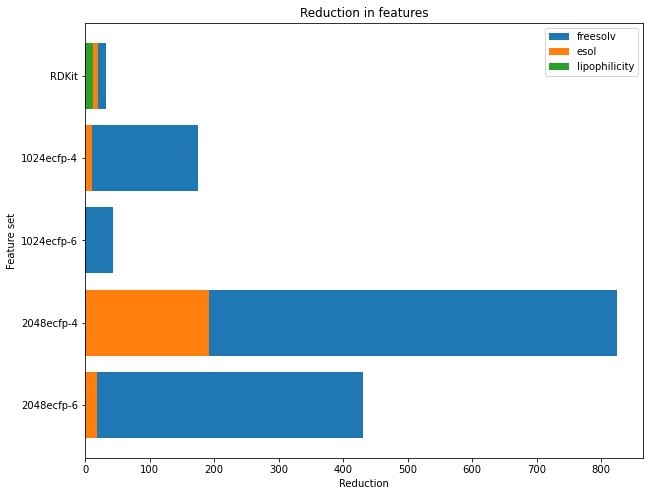

In [26]:
feature_sets_keys = ['RDKit', '1024ecfp-4', '1024ecfp-6', '2048ecfp-4', '2048ecfp-6'][::-1]
positions = range(len(feature_sets_keys))

plt.figure(figsize=(10, 8))
plt.tight_layout()

width = 0.8 # the width of the bars

f = plt.barh(positions, freesolv_reductions['Reduction'][::-1], width)
e = plt.barh(positions, esol_reductions['Reduction'][::-1], width)
l = plt.barh(positions, lipophilicity_reductions['Reduction'][::-1], width)

plt.yticks(positions, feature_sets_keys)
plt.ylabel('Feature set')
plt.xlabel('Reduction')
plt.title('Reduction in features')

plt.legend((f[0], e[0], l[0]), ('freesolv', 'esol', 'lipophilicity'))

# TODO: fix y-labels to fit the saved image
plt.savefig('../figures/comparison_of_zero_var_feature_reduction_for_all_datasets.png')
plt.show()

# Check RDKit descriptors for highly correlated features with the targets

## logP columns (a lead from Garrett)

In [27]:
import re

suspicious_cols = []
for name in rdkit_features.columns:
    m = re.match('(.)*(logP|LogP)(.)*', name)
    if m is not None:
        suspicious_cols.append(m[0])

In [28]:
suspicious_cols

['SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA5',
 'SlogP_VSA6',
 'SlogP_VSA7',
 'SlogP_VSA8',
 'SlogP_VSA9',
 'MolLogP']

## Iteration through all and checking correlations

In [29]:
threshold = 0.75
cols_to_remove = [] # column names with correlation > threshold
col_name_1 = 'pearson_r'
col_name_2 = 'abs(pearson_r)'
all_correlations = {
    col_name_1: {},
    col_name_2: {}
}

for name in rdkit_features.columns.difference(cols_with_nas):
    all_correlations[col_name_1][name] = pearsonr(rdkit_features[name], labels)[0]
    all_correlations[col_name_2][name] = np.abs(pearsonr(rdkit_features[name], labels)[0])
    if np.abs(all_correlations[col_name_2][name]) > threshold:
        cols_to_remove.append(name)

print(len(all_correlations[col_name_2]))
cols_to_remove

200


['MolLogP']

In [30]:
all_correlations_df = pd.DataFrame(all_correlations).sort_values(by=col_name_2, ascending=False)

display(all_correlations_df[:10])

pearson_r  abs(pearson_r)
MolLogP           -0.827918        0.827918
PEOE_VSA6         -0.705311        0.705311
MolMR             -0.699756        0.699756
Chi0v             -0.679998        0.679998
FpDensityMorgan1   0.670342        0.670342
Chi1v             -0.657564        0.657564
FpDensityMorgan2   0.646831        0.646831
MolWt             -0.640189        0.640189
HeavyAtomMolWt    -0.639511        0.639511
ExactMolWt        -0.639112        0.639112

In [31]:
all_correlations_df.loc[suspicious_cols].sort_values(by=col_name_2, ascending=False)

pearson_r  abs(pearson_r)
MolLogP      -0.827918        0.827918
SlogP_VSA6   -0.449784        0.449784
SlogP_VSA8   -0.406413        0.406413
SlogP_VSA12  -0.390944        0.390944
SlogP_VSA7   -0.371868        0.371868
SlogP_VSA5   -0.275599        0.275599
SlogP_VSA4   -0.180616        0.180616
SlogP_VSA10  -0.113968        0.113968
SlogP_VSA2    0.108928        0.108928
SlogP_VSA3   -0.077157        0.077157
SlogP_VSA11  -0.062042        0.062042
SlogP_VSA1    0.012001        0.012001
SlogP_VSA9         NaN             NaN

In [32]:
display(all_correlations_df[-10:])

pearson_r  abs(pearson_r)
fr_isothiocyan                NaN             NaN
fr_lactam                     NaN             NaN
fr_morpholine                 NaN             NaN
fr_nitro_arom_nonortho        NaN             NaN
fr_nitroso                    NaN             NaN
fr_prisulfonamd               NaN             NaN
fr_quatN                      NaN             NaN
fr_tetrazole                  NaN             NaN
fr_thiocyan                   NaN             NaN
fr_unbrch_alkane              NaN             NaN

How many NaNs did we get?

In [33]:
all_correlations_df[col_name_1].isna().sum()

20

Why do we get NaNs?

In [34]:
all_correlations_df.iloc[-1,:]

pearson_r        NaN
abs(pearson_r)   NaN
Name: fr_unbrch_alkane, dtype: float64

In [35]:
all_correlations_df.iloc[-1,:].name

'fr_unbrch_alkane'

In [36]:
rdkit_features[all_correlations_df.iloc[-1,:].name]

Amigdalin         0.0
Fenfuram          0.0
citral            0.0
Picene            0.0
Thiophene         0.0
                 ... 
halothane         0.0
Oxamyl            0.0
Thiometon         0.0
2-Methylbutane    0.0
Stirofos          0.0
Name: fr_unbrch_alkane, Length: 1128, dtype: float64

In [37]:
rdkit_features[all_correlations_df.iloc[-1,:].name].std()

0.0

**Important:** we were getting NaNs for correlations for features with zero variance.

Let's check:

**Zero-variance features:**

In [38]:
zero_var_features = rdkit_features.columns[rdkit_features.std(axis=0) == 0]
zero_var_features

Index(['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_Al_COO',
       'fr_Ar_COO', 'fr_COO', 'fr_COO2', 'fr_azide', 'fr_diazo', 'fr_isocyan',
       'fr_isothiocyan', 'fr_lactam', 'fr_morpholine',
       'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_prisulfonamd', 'fr_quatN',
       'fr_tetrazole', 'fr_thiocyan', 'fr_unbrch_alkane'],
      dtype='object')

**Features with NaNs:**

In [39]:
nan_corr_features = all_correlations_df.index[all_correlations_df[col_name_1].isna()]
nan_corr_features

Index(['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_Al_COO',
       'fr_Ar_COO', 'fr_COO', 'fr_COO2', 'fr_azide', 'fr_diazo', 'fr_isocyan',
       'fr_isothiocyan', 'fr_lactam', 'fr_morpholine',
       'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_prisulfonamd', 'fr_quatN',
       'fr_tetrazole', 'fr_thiocyan', 'fr_unbrch_alkane'],
      dtype='object')

**Check if the same:**

In [40]:
(zero_var_features == nan_corr_features).all()

True

# Automate the process of removing high correlation features

In [60]:
def list_highly_correlated(df_features, targets, threshold=0.8):
    """
    List column names of the dataframe of features which are highly correlated
    to the target (absolute value of the correlation is greater than threshold).

    df_features: pandas.core.frame.DataFrame of features
    targets: pandas.core.series.Series of targets
    threshold: float in [0, 1] above which we consider a feature highly correlated

    returns: list of columns names from df_features, which are highly correlated
             to the target

    """
    # check bounds for abs(correlation) threshold
    assert 0 <= threshold <= 1

    # df_features and targets should have the same length
    assert df_features.shape[0] == targets.shape[0]
    print('Original shapes:                 ', df_features.shape, targets.shape)

    # remove na rows
    X = df_features.dropna(axis=0)
    y = targets[X.index]
    print('Removed NA rows, shapes:         ', X.shape, y.shape)

    # remove zero-variace columns
    zero_std = X.std() < 1e-5
    zero_std_cols = X.columns[zero_std]
    X = X.drop(zero_std_cols, axis=1)
    print('Removed zero-var columns, shapes:', X.shape, y.shape)

    # record highly correlated features
    cols_to_remove = []
    for name in X.columns:
        # print(name, np.abs(pearsonr(X[name], y)[0]))
        if np.abs(pearsonr(X[name], y)[0]) > threshold:
            cols_to_remove.append(name)

    return cols_to_remove

In [61]:
list_highly_correlated(rdkit_features, labels, threshold=0.8)

Original shapes:                  (1128, 200) (1128,)
Removed NA rows, shapes:          (1128, 200) (1128,)
Removed zero-var columns, shapes: (1128, 180) (1128,)


['MolLogP']